# Activity 4

This activity is an application of the bisection method for univariate root-finding.

## Imports

If you wish to import other packages and/or modules,
add a blank line after importing `scipy.optimize` in the following code cell,
followed by the comment line `# Custom imports`,
after which your additional imports should be disclosed.
For example, to use NumPy, the succeeding code cell should show

>> ```python
>> import math as mt
>> 
>> import scipy.optimize as spo
>> 
>> # Custom imports
>> import numpy as np
>> ```

In [1]:
import math as mt

import scipy.optimize as spo

# Custom imports

## Scenario

Suppose you have a second-order circuit that can be reduced into
an equivalent resistance $R$
parallel-connected to
an equivalent inductance $L$
as well as to
an equivalent capacitance $C$
(see [diagram](./act-04.png)).
The said model is only valid over the interval $4 \leq t \leq 21$ seconds.

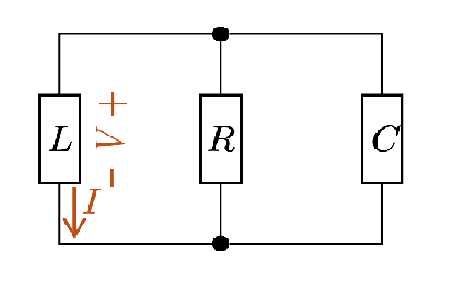

Determine:
- the minimum voltage across the equivalent-inductance element,
  and
- when the voltage across the equivalent-resistance element is a minimum,

for when:
- $C = 500$ millifarads,
- $R = \frac{2}{3}$ ohms,
  and
- $L = 1000$ millihenrys,

provided that 
$V = 10$ volts
and
$I = 2$ amperes
at the start of the applicable interval.

## Solution

Applying KCL on the top node:
$$i_L(t) + i_R(t) + i_C(t) = 0$$

Express each branch current in terms of 𝑉:
$$i_L(t) + \frac{V(t)}{R}\ + C\frac{dV(t)}{dt}\ = 0$$

Differentiate the KCL with respect to time (t) (so that $i_L(t)$ is replaced by $\frac{di_L(t)}{dt}\ = \frac{V(t)}{L}\ $):
$$\frac{1}{L}\ V(t) + \frac{1}{R}\ \frac{dV(t)}{dt}\ + C\frac{d^2V(t)}{dt^2}\ = 0$$

Dividing both sides by C, rearranging, and Substituting the given:
$$\frac{d^2V(t)}{dt^2}\ + \frac{1}{RC}\ \frac{dV(t)}{dt}\ + \frac{1}{LC}\ V(t) = 0$$
$$\frac{d^2V(t)}{dt^2}\ + 3 \frac{dV(t)}{dt}\ + 2 V(t) = 0$$

Since this is a simple parallel RLC circuit, we can define $α$ and $ω_0$:
$$α =\frac{1}{2RC}\ = \frac{3}{2}\ s^{-1} $$ 
$$ω_0 = \frac{1}{\sqrt{LC}}\ =\sqrt{2} s^{-1}$$

Since $α$ > $ω_0$ the system is overdamped with two real and distinct roots:
$$ s_{1,2} = -α\pm \ \sqrt{α^2-ω_0^2} $$
$$ s_1 = -1 $$
$$ s_2 = -2$$

Thus the general solution for the voltage (using time origin shifted to the start of the model interval $t_0 = 4s$; defining $τ = t-t_0$ :
$$V(τ) = Ae^{-τ} + Be^{-2τ}$$
$$V(t) = Ae^{-(t-4)} + Be^{-2(t-4)}$$

Solving for constants A and B, we apply the predetermined conditions. Let the initial capacitor voltage at $t_0=4s$ be $V_0=V(4)$, and the initial inductor current be $I_0=i_L(4)$. Then at $τ = 0$:
$$V(0) = A + B = 10V → Eq.1 $$

Differentiating $V(τ)$:
$$V'(τ) = -Ae^{-τ} - 2Be^{-2τ}$$

From capacitor current:
$$CV'(0) = i_C(0)=-(i_L(0) + i_R(0)) = -\frac{V(0)}{R}\ - I_0$$
$$V'(0) = -\frac{1}{C}\ (\frac{V(0)}{R}\ +  I_0) $$

Substituting:
$$V'(0) = -2 (\frac{3}{2}\ V(0) + I(0)) = -(3V(0) + 2I(0)) = -34V $$
$$V'(0) = -A- 2B = -34 → Eq.2 $$

Two equations, two unknowns:
$$A = -14 $$
$$B = 24 $$

Hence, our $V(t)$:
$$V(τ) = -14e^{-τ} + 24e^{-2τ}$$
$$V(t) = -14e^{-(t-4)} + 24e^{-2(t-4)}$$

A minimum of $V(t)$ occurs when $\frac{dV(t)}{dt}\ = 0 $, that is our $f(t)$:
$$f(t) = \frac{dV(t)}{dt}\ = \frac{d}{dt}\ (-14e^{-(t-4)} + 24e^{-2(t-4)})$$

$$f(t) = 14e^{-(t-4)} - 48e^{-2(t-4)}$$


## Modelling

Derive $f\!\left(t\right)$ whose root corresponds to when the voltage across the equivalent-resistance element is a minimum.
Then, derive an expression of $V\!\left(t\right)$ across the equivalent-inductance element.

Construct two Python functions,
`f()` and `v_L()`,
that implement $f\!\left(t\right)$ and $V\!\left(t\right)$, respectively.
Both `f()` and `v_L()` take a single positional argument `t`.

In the succeeding code cell,
replace the `pass` statement with your code.

In [2]:
def f(t): # Corresponds to when the voltage across the equivalent-resistance element is a minimum
    tau = t-4
    return 14 * mt.exp(-tau) - 48 * mt.exp(-2*tau) # in Volts

def v_L(t): # Corresponds to the voltage of the inductance element
    tau = t-4
    return -14 * mt.exp(-tau) + 24 * mt.exp(-2*tau) # in Volts

Use bisection method to find the root of $f\!\left(t\right)$.

Define Python variables `TL` and `TU`
to which are respectively assigned the lower and the upper end of the search interval.
Run
[`scipy.optimize.bisect()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
such that you get the (approximate) root as well as information concerning the root-finding process,
where the said outputs are stored in Python variables `t_bs` and `t_bs_info`, respectively.
Use default values for tolerances.

In the succeeding code cell,
replace the `pass` statement with your code.

In [3]:
# Define bisection parameters
TL , TU = 4, 21             # lower and upper bound (s)

print(f"Finding a root in the interval [{TL}, {TU}]:")

# Use scipy bisection method
t_bs, t_bs_info = spo.bisect(
   f, TL, TU, full_output = True, disp = False
)

Finding a root in the interval [4, 21]:


In [4]:
print(t_bs_info) # the root is in the unit 'second/s'

      converged: True
           flag: converged
 function_calls: 45
     iterations: 43
           root: 5.232143681292314
         method: bisect


## Results and discussion

Verify if the obtained (approximate) root is indeed the root
by printing the corresponding value of $f\!\left(t\right)$.
The printed display should follow the following format

>> Residual value: 1.23456790e-07

where 1.23456790e-07 is just an exemplar value.

In the succeeding code cell,
replace the `pass` statement with your code.

In [5]:
# Computing the value of f(t) at the root value
residual = f(t_bs)

# Printing the residual
print (f"Residual value: {residual:.8e} volts")

Residual value: -1.30029321e-12 volts


Print the minimum voltage across the equivalent-inductance element,
such that the output follows the following:

>> The minimum voltage across the equivalent-inductance element is 1.234567 volts.

where 1.234567 is just an examplar value for the said minimum voltage.

In the succeeding code cell,
replace the `pass` statement with your code.

In [6]:
# The minimum voltage across the equivalent-inductance element
V_min = v_L(t_bs)

print (f" The minimum voltage across the equivalent-inductance element: {V_min:.6e} volts")

 The minimum voltage across the equivalent-inductance element: -2.041667e+00 volts


## Submission instructions

Download this notebook file,
and save with a filename following the pattern
`ACT-04_<section>_<ID number>`,
where the section is as reflected in your Google Classroom.
For example, if your ID number is 2013-0024
and you are enrolled to the M34W12 class,
then your notebook should be named `ACT-04_M34W12_2013-0024.ipynb`.
Submit your notebook via the classwork platform for this activity in Google Classroom.
Submissions beyond the deadline will not be considered.

Lastly, the use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, please include a brief statement (in a private comment to this classwork)
declaring which and how AI tools are used in your work.

*Last updated by Christian Cahig on 2025-10-09*